# train: fix
# test: mix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
import warnings
warnings.filterwarnings("ignore")

colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participants', 'color', 'number', 'both']

In [2]:
output_dir = r"20_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '16_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '17_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '18_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True) 
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
for df in df_participants:
    df['block_type'] = None

    df.loc[df['block'] == 1, 'block_type'] = 'uniform'     # Block 1 is uni
    df.loc[df['block'] == 4, 'block_type'] = 'mix'     # Block 4 is mix

    # For blocks 2 and 3, set based on distribution
    df.loc[(df['block'] == 2) & (df['distribution'] == 'low'), 'block_type'] = 'low'
    df.loc[(df['block'] == 2) & (df['distribution'] == 'high'), 'block_type'] = 'high'
    df.loc[(df['block'] == 3) & (df['distribution'] == 'low'), 'block_type'] = 'low'
    df.loc[(df['block'] == 3) & (df['distribution'] == 'high'), 'block_type'] = 'high'
    

# adding myCard and youCard to the models dataset and also adding model_outcome

In [4]:
for i in range(len(df_participants)):
    myCard = df_participants[i]['myCard']
    yourCard = df_participants[i]['yourCard']
    distributions = df_participants[i]['distribution']
    block_type = df_participants[i]['block_type']
    
    for df_list in [df_colors, df_numbers, df_colors_numbers]:
        df_list[i]['myCard'] = myCard
        df_list[i]['yourCard'] = yourCard
        df_list[i]['distribution'] = distributions
        df_list[i]['block_type'] = block_type

# adding model outcome

In [5]:
for df in df_colors:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes
    
    


for df in df_numbers:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes
    
    

for df in df_colors_numbers:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes

In [6]:
df_participants[2]

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,risk,block_type
0,1031,uniform,892,lose,9,2,2913,9.5,2,response,arrowdown,1,0,0.000,uniform
1,2032,uniform,908,lose,4,9,11302,9,3,response,arrowup,1,0,0.375,uniform
2,1095,uniform,898,lose,4,7,1170,8.5,4,response,arrowup,1,0,0.375,uniform
3,723,uniform,970,lose,1,5,2098,8,5,response,arrowup,1,0,0.000,uniform
4,2334,uniform,841,lose,1,3,8014,7.5,6,response,arrowup,1,0,0.000,uniform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,606,uniform,754,win,8,2,1211,65,32,response,arrowup,4,0,0.125,mix
266,626,high,816,win,9,8,1368,65.5,118,response,arrowup,4,0,0.000,mix
267,780,high,783,win,8,5,1146,66,97,response,arrowup,4,0,0.243,mix
268,160,low,833,win,2,6,1044,66.5,55,response,arrowdown,4,0,0.243,mix


In [7]:
df_colors[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val,myCard,yourCard,distribution,block_type,outcome
0,1,0,10.5,9.5,"[[0.014235063691182178, 0.017257467260049387],...",9,2,uniform,uniform,win
1,1,1,10.0,9.0,"[[0.014235063691182178, 0.01440111094278146], ...",4,9,uniform,uniform,lose
2,0,1,10.5,8.5,"[[0.014235063691182178, 0.011560527759644229],...",4,7,uniform,uniform,win
3,0,1,11.0,8.0,"[[0.014235063691182178, 0.008735630609543616],...",1,5,uniform,uniform,win
4,0,1,11.5,7.5,"[[0.014235063691182178, 0.00592633287236799], ...",1,3,uniform,uniform,win
...,...,...,...,...,...,...,...,...,...,...
265,1,1,26.0,65.0,"[[0.04761695740831286, 0.056902572586927276], ...",8,2,uniform,mix,win
266,0,1,25.5,65.5,"[[0.04761695740831286, 0.056902572586927276], ...",9,8,high,mix,lose
267,0,1,25.0,66.0,"[[0.04761695740831286, 0.056902572586927276], ...",8,5,high,mix,lose
268,1,0,24.5,66.5,"[[0.04761695740831286, 0.056902572586927276], ...",2,6,low,mix,lose


In [8]:
df_numbers[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val,myCard,yourCard,distribution,block_type,outcome
0,1,0,10.5,9.5,"[[-0.005786009774610761, -0.000356453847500772...",9,2,uniform,uniform,win
1,0,1,11.0,9.0,"[[-0.005786009774610761, -0.000356453847500772...",4,9,uniform,uniform,win
2,0,1,11.5,8.5,"[[-0.005786009774610761, -0.000356453847500772...",4,7,uniform,uniform,win
3,0,1,12.0,8.0,"[[-0.005786009774610761, -0.07076833335268379]...",1,5,uniform,uniform,win
4,0,1,12.5,7.5,"[[-0.005786009774610761, -0.1312574733095825],...",1,3,uniform,uniform,win
...,...,...,...,...,...,...,...,...,...,...
265,1,1,91.0,65.0,"[[0.4821079868202207, -0.26621446046937075], [...",8,2,uniform,mix,win
266,1,1,91.5,65.5,"[[0.4821079868202207, -0.26621446046937075], [...",9,8,high,mix,win
267,1,1,92.0,66.0,"[[0.4821079868202207, -0.26621446046937075], [...",8,5,high,mix,win
268,0,0,92.5,66.5,"[[0.4821079868202207, -0.26621446046937075], [...",2,6,low,mix,win


In [9]:
df_colors_numbers[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val,myCard,yourCard,distribution,block_type,outcome
0,1,0,10.5,9.5,"[[[-0.02043867387785598, -0.000672324798613683...",9,2,uniform,uniform,win
1,0,1,11.0,9.0,"[[[-0.02043867387785598, -0.000672324798613683...",4,9,uniform,uniform,win
2,0,1,11.5,8.5,"[[[-0.02043867387785598, -0.000672324798613683...",4,7,uniform,uniform,win
3,0,1,12.0,8.0,"[[[-0.02043867387785598, -0.16205649346280912]...",1,5,uniform,uniform,win
4,0,1,12.5,7.5,"[[[-0.02043867387785598, -0.2712808256330045],...",1,3,uniform,uniform,win
...,...,...,...,...,...,...,...,...,...,...
265,1,1,108.0,65.0,"[[[0.42609702788977066, -0.395234205270073], [...",8,2,uniform,mix,win
266,1,1,108.5,65.5,"[[[0.42609702788977066, -0.395234205270073], [...",9,8,high,mix,win
267,1,1,109.0,66.0,"[[[0.42609702788977066, -0.395234205270073], [...",8,5,high,mix,win
268,0,0,109.5,66.5,"[[[0.42609702788977066, -0.395234205270073], [...",2,6,low,mix,win


# total reward

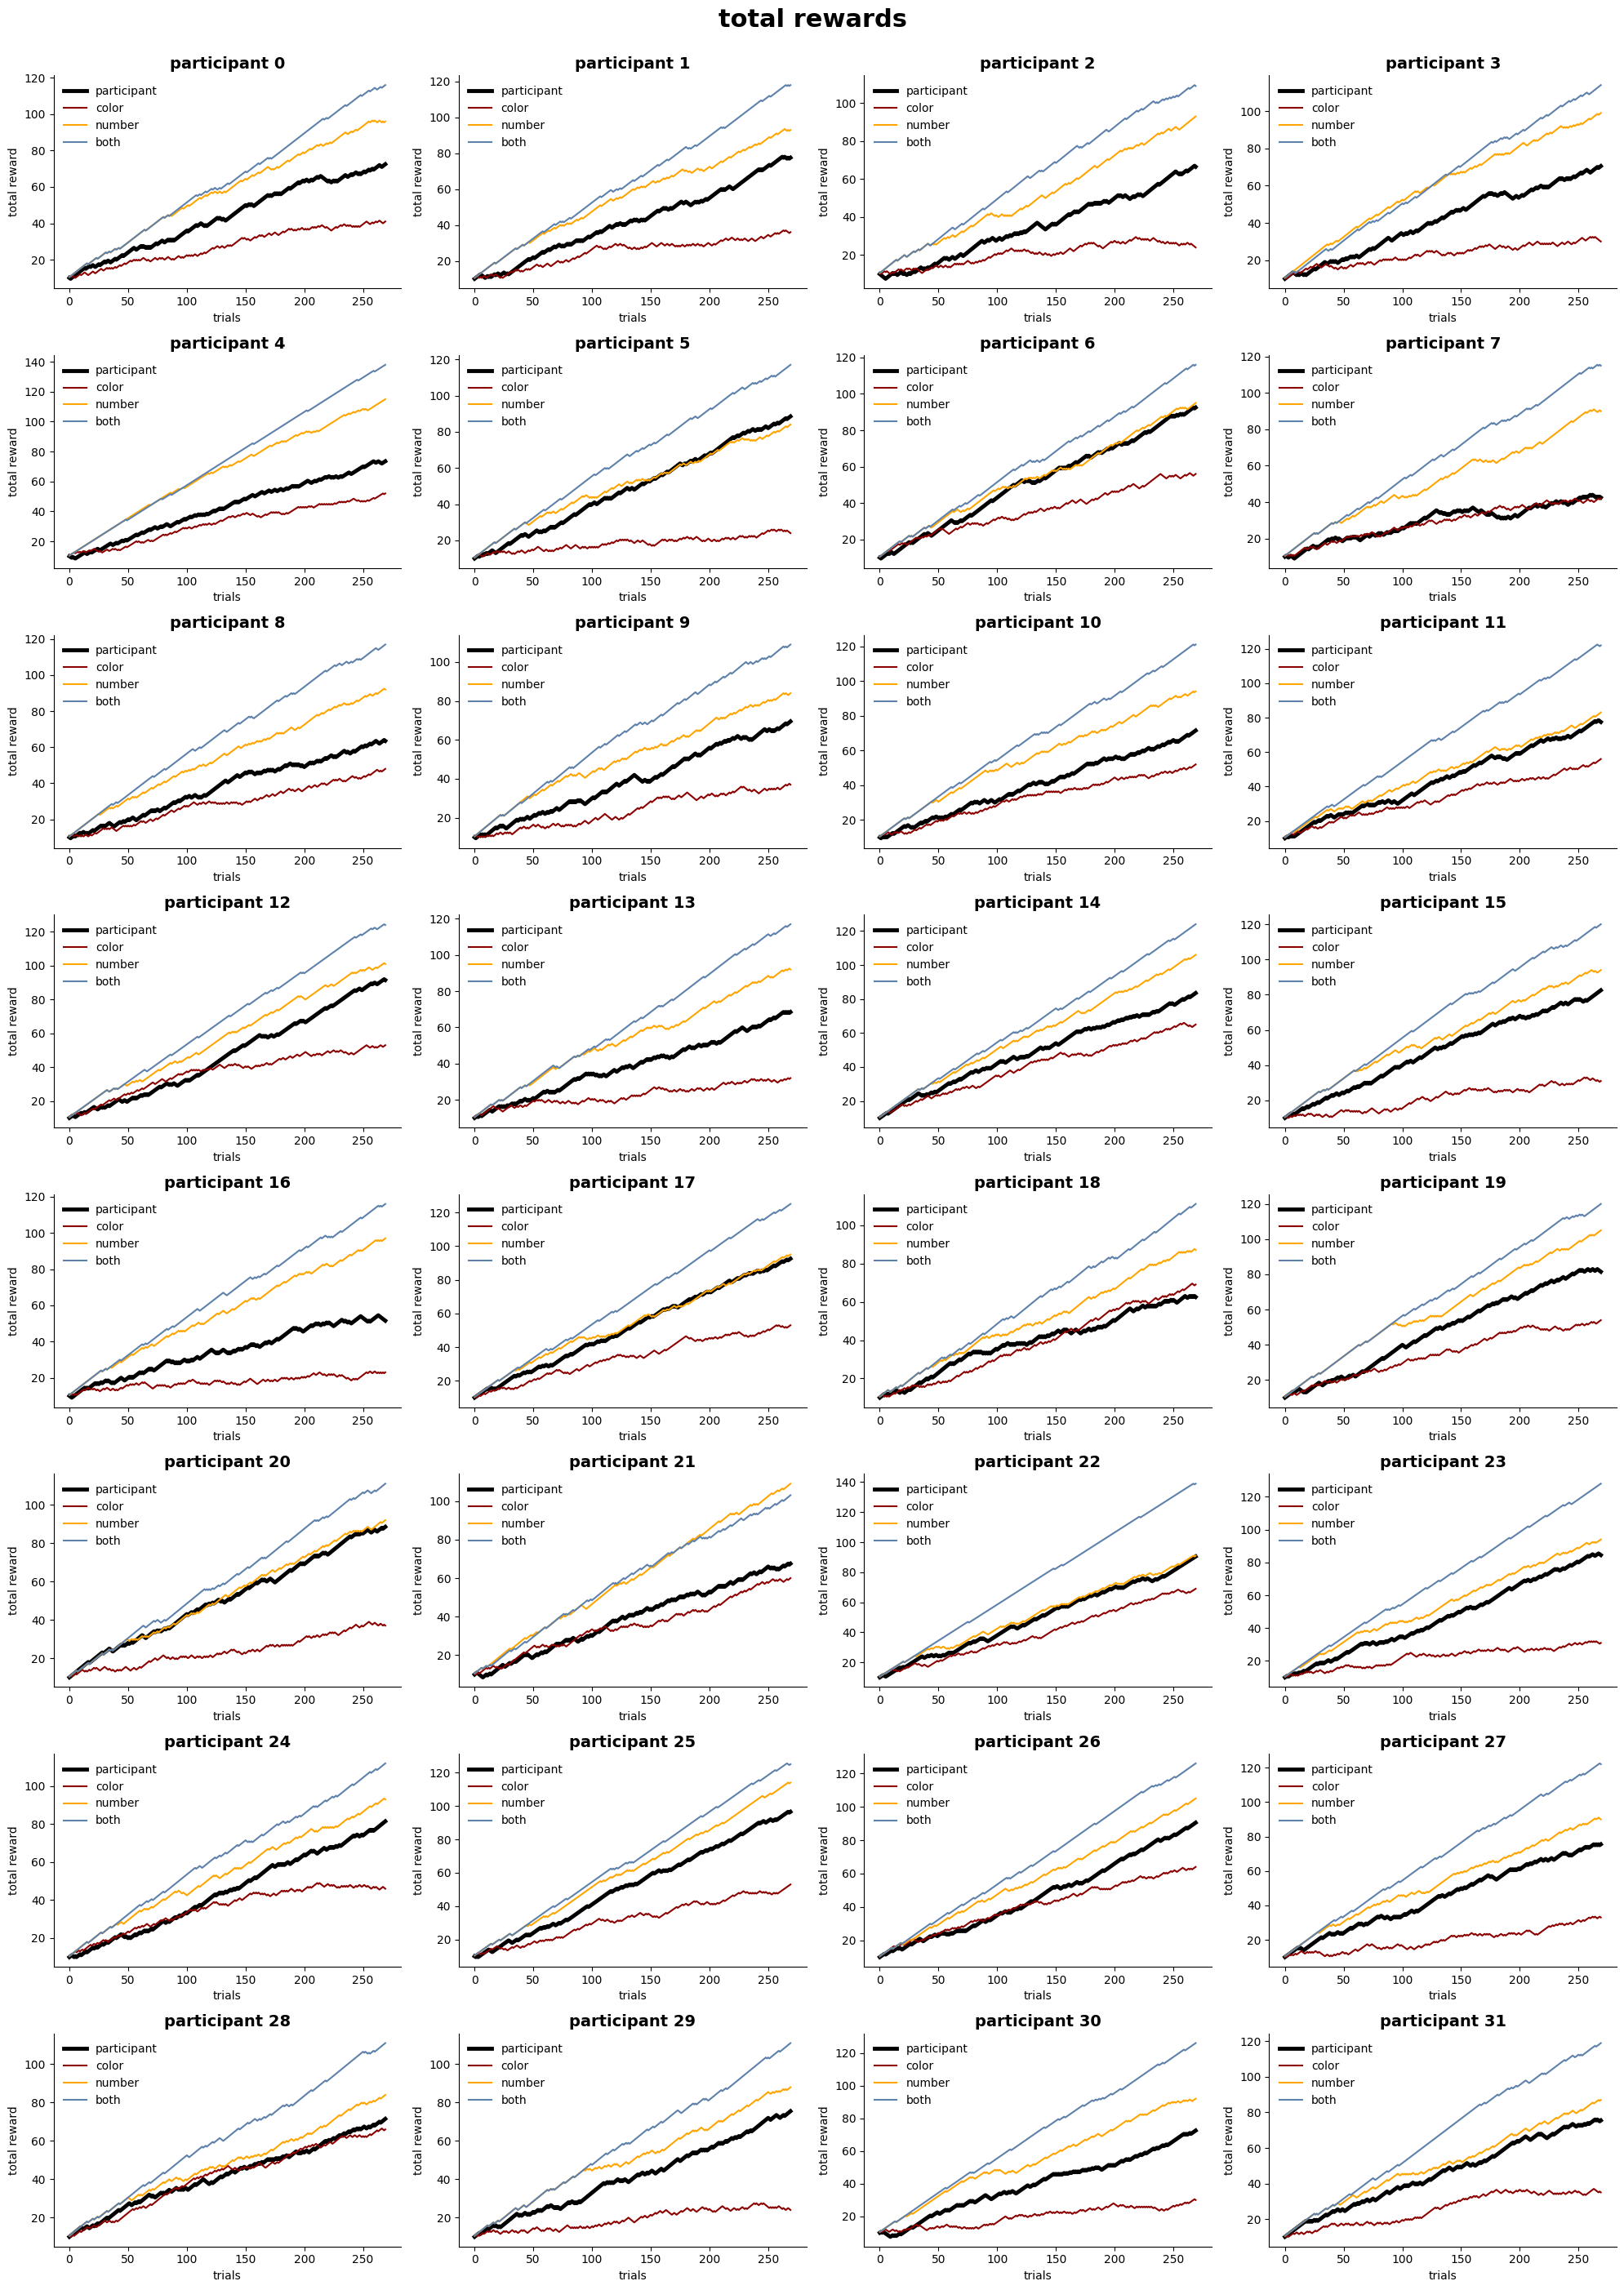

In [10]:
num_subplots = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 28))
axes = axes.flatten()


colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participant', 'color', 'number', 'both']

for i in range(num_subplots):
    ax = axes[i]

    ax.plot(range(trial_num), (df_participants[i]['totalReward'] - df_participants[i]['totalReward'].iloc[0] )+10, label=labels[0], color=colors[0], linewidth=3.5)
    ax.plot(range(trial_num), df_colors[i]['model_total_reward'], label=labels[1], color=colors[1])
    ax.plot(range(trial_num), df_numbers[i]['model_total_reward'], label=labels[2], color=colors[2])
    ax.plot(range(trial_num), df_colors_numbers[i]['model_total_reward'], label=labels[3], color=colors[3])

    ax.set_title(f'participant {i}' , fontsize=14, fontweight='bold')
    ax.set_xlabel('trials')
    ax.set_ylabel('total reward')
    ax.legend(frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('total rewards', fontsize=22, fontweight='bold', y=1)

plt.tight_layout(rect=[0, 0, 1, 1]) 

filename = os.path.join(output_dir, "total_reward.pdf")
plt.savefig(filename, format='pdf')

# plt.close()


# comparing accuracy in the mix block:

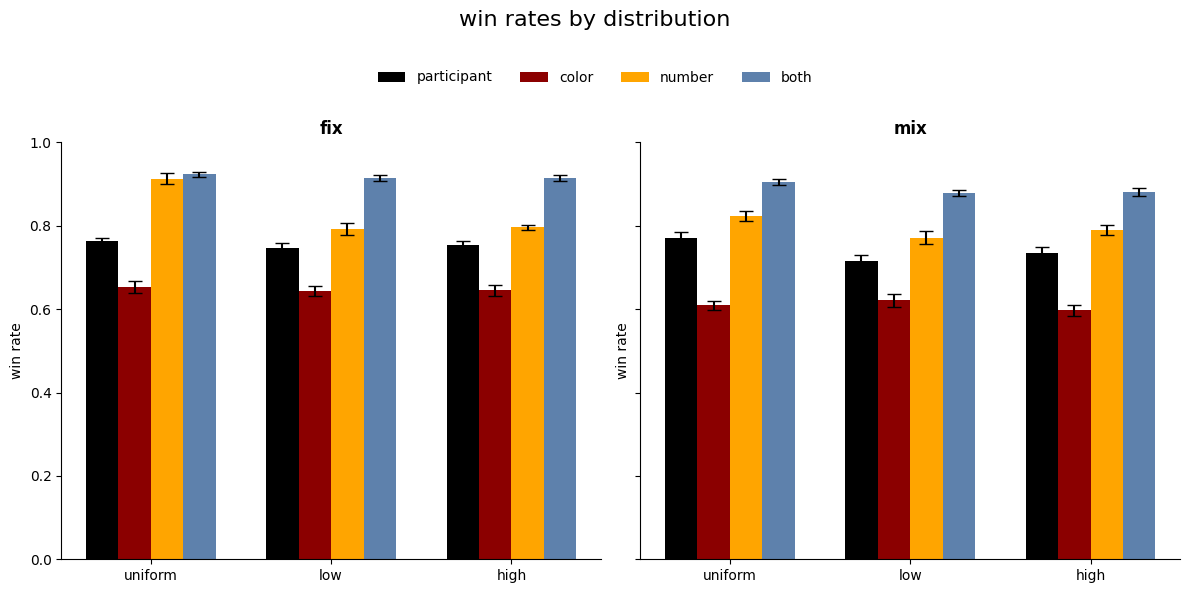

In [11]:
def compute_win_rates_by_block_type(df_list, x_labels=['uniform', 'low', 'high']):
    win_rates_mix = []
    win_rates_non_mix = []

    for df in df_list:
        df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

        df_mix = df[df['block_type'] == 'mix']
        df_non_mix = df[df['block_type'] != 'mix']

        if not df_mix.empty:
            total_trials_mix = df_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_mix = df_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_mix = pd.merge(total_trials_mix, wins_mix, on='distribution')
            win_rate_mix['win_rate'] = win_rate_mix['wins'] / win_rate_mix['total_trials']
            win_rates_mix.append(win_rate_mix[['distribution', 'win_rate']])

        if not df_non_mix.empty:
            total_trials_non_mix = df_non_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_non_mix = df_non_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_non_mix = pd.merge(total_trials_non_mix, wins_non_mix, on='distribution')
            win_rate_non_mix['win_rate'] = win_rate_non_mix['wins'] / win_rate_non_mix['total_trials']
            win_rates_non_mix.append(win_rate_non_mix[['distribution', 'win_rate']])

    def compute_group_stats(win_rates_list):
        combined = pd.concat(win_rates_list)
        mean = combined.groupby('distribution')['win_rate'].mean().reset_index()
        std = combined.groupby('distribution')['win_rate'].std().reset_index()
        stats = mean.merge(std, on='distribution', suffixes=('_mean', '_std'))
        stats['distribution'] = pd.Categorical(stats['distribution'], categories=x_labels, ordered=True)
        return stats.sort_values(by='distribution').reset_index(drop=True)

    return compute_group_stats(win_rates_mix), compute_group_stats(win_rates_non_mix), win_rates_mix, win_rates_non_mix



#  participants
mean_win_rates_df_participants_mix, mean_win_rates_df_participants_non_mix, win_rates_mix, win_rates_non_mix = compute_win_rates_by_block_type(df_participants)

#  colors
mean_win_rates_df_colors_mix, mean_win_rates_df_colors_non_mix, win_rates_colors_mix, win_rates_colors_non_mix = compute_win_rates_by_block_type(df_colors)

#  numbers
mean_win_rates_df_numbers_mix, mean_win_rates_df_numbers_non_mix, win_rates_numbers_mix, win_rates_numbers_non_mix = compute_win_rates_by_block_type(df_numbers)

#  both 
mean_win_rates_df_colors_numbers_mix, mean_win_rates_df_colors_numbers_non_mix, win_rates_colors_numbers_mix, win_rates_colors_numbers_non_mix = compute_win_rates_by_block_type(df_colors_numbers)


colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participant', 'color', 'number', 'both']
x_labels = ['uniform', 'low', 'high']
x = np.arange(len(x_labels))
bar_width = 0.18

def compute_sem(win_rates_list):
    combined = pd.concat(win_rates_list)
    sem = combined.groupby('distribution')['win_rate'].sem().reset_index()
    return sem

mean_dfs_fix = [mean_win_rates_df_participants_non_mix, 
                mean_win_rates_df_colors_non_mix, 
                mean_win_rates_df_numbers_non_mix, 
                mean_win_rates_df_colors_numbers_non_mix]

mean_dfs_mix = [mean_win_rates_df_participants_mix, 
                mean_win_rates_df_colors_mix, 
                mean_win_rates_df_numbers_mix, 
                mean_win_rates_df_colors_numbers_mix]

sem_dfs_fix = [compute_sem(lst) for lst in [win_rates_non_mix, win_rates_colors_non_mix, win_rates_numbers_non_mix, win_rates_colors_numbers_non_mix]]
sem_dfs_mix = [compute_sem(lst) for lst in [win_rates_mix, win_rates_colors_mix, win_rates_numbers_mix, win_rates_colors_numbers_mix]]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bars = []

for ax_idx, (ax, mean_dfs, sem_dfs, title) in enumerate(zip(
    axes, [mean_dfs_fix, mean_dfs_mix], [sem_dfs_fix, sem_dfs_mix], ['fix', 'mix'])):

    for i, (mean_df, sem_df, color, label) in enumerate(zip(mean_dfs, sem_dfs, colors, labels)):
        means = mean_df['win_rate_mean'].values
        errors = sem_df['win_rate'].values
        bar = ax.bar(x + i * bar_width, means, width=bar_width, label=label, color=color, yerr=errors, capsize=5)
        if ax_idx == 0:
            bars.append(bar[0])

    ax.set_title(f'{title}', fontweight='bold')
    ax.set_xticks(x + 1.5 * bar_width)
    ax.set_xticklabels(x_labels)
    ax.set_ylabel('win rate')
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


fig.legend(bars, labels,  loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 0.9))
plt.suptitle('win rates by distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.88])
filename = os.path.join(output_dir, "win_rates.pdf")
plt.savefig(filename, format='pdf')
plt.show()


# accuracy of different numbers

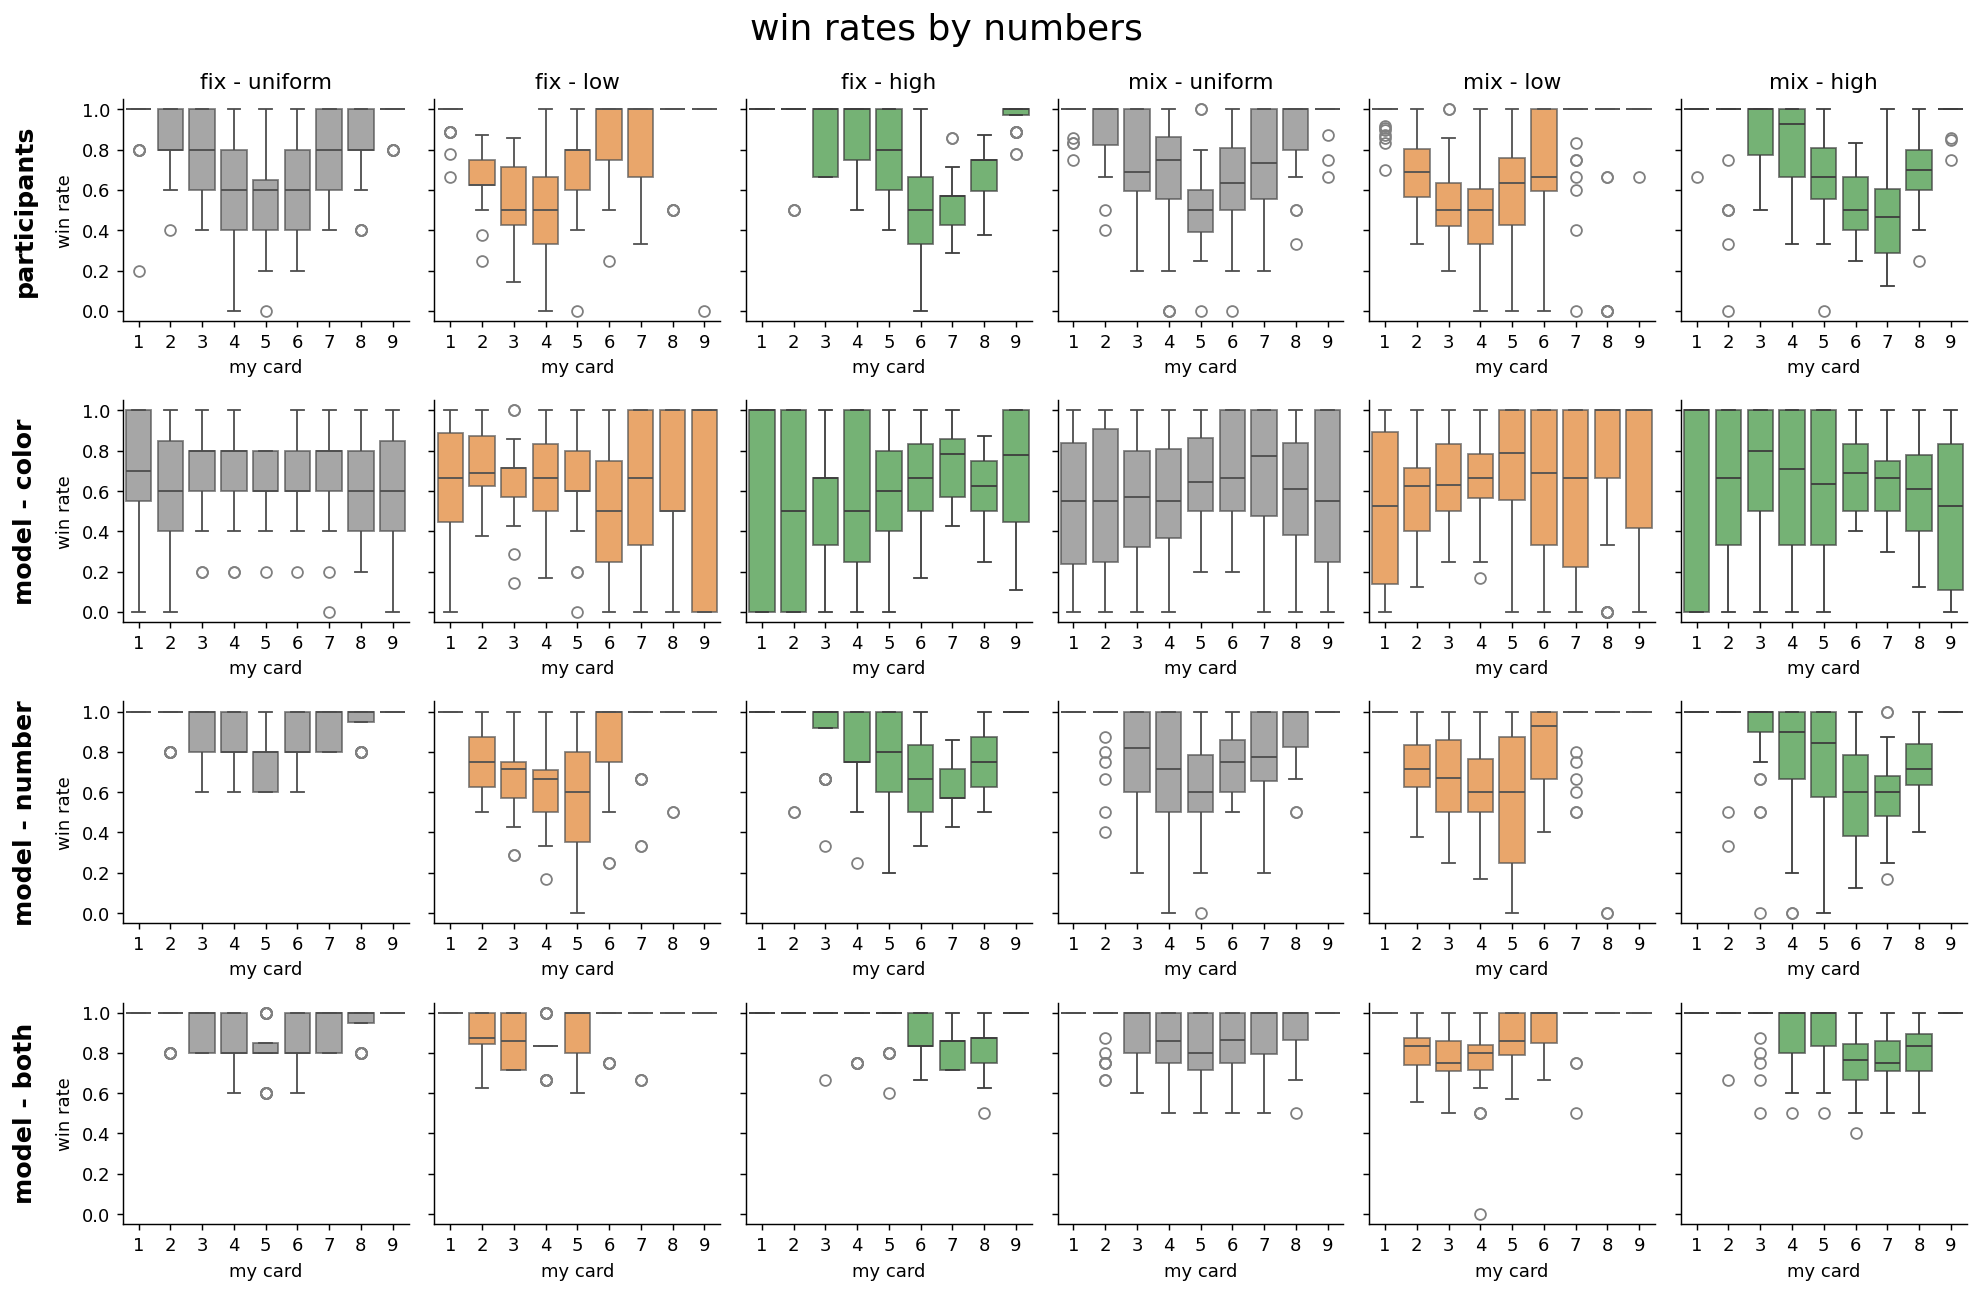

In [12]:
def compute_accuracy_rates(df_list):
    accuracy_fix_all, accuracy_mix_all = [], []
    for df in df_list:
        df['outcome'] = df['outcome'].astype(str)
        df['is_win'] = df['outcome'] == 'win'

        df_mix = df[df['block_type'] == 'mix']
        df_non_mix = df[df['block_type'] != 'mix']

        if not df_mix.empty:
            mix_rate = df_mix.groupby(['myCard', 'distribution'])['is_win'].mean().reset_index()
            mix_rate.rename(columns={'is_win': 'accuracy_rate'}, inplace=True)
            accuracy_mix_all.append(mix_rate)

        if not df_non_mix.empty:
            fix_rate = df_non_mix.groupby(['myCard', 'distribution'])['is_win'].mean().reset_index()
            fix_rate.rename(columns={'is_win': 'accuracy_rate'}, inplace=True)
            accuracy_fix_all.append(fix_rate)

    combined_mix = pd.concat(accuracy_mix_all)
    combined_fix = pd.concat(accuracy_fix_all)

    for df in [combined_mix, combined_fix]:
        df['distribution'] = pd.Categorical(df['distribution'], categories=x_labels, ordered=True)

    return combined_fix, combined_mix

x_labels = ['uniform', 'low', 'high']
color_map = {'uniform': '#808080', 'low': '#ff7f0e', 'high': '#2ca02c'}

datasets = [
    (df_participants, 'participants'),
    (df_colors, 'model - color'),
    (df_numbers, 'model - number'),
    (df_colors_numbers, 'model - both')
]

all_combined_data = [compute_accuracy_rates(ds[0]) + (ds[1],) for ds in datasets] 

fig, axes = plt.subplots(4, 6, figsize=(16, 10), dpi=130, sharey='row')

for row_idx, (combined_fix, combined_mix, row_title) in enumerate(all_combined_data):
    for block_data, block_title, col_offset in zip([combined_fix, combined_mix], ['fix', 'mix'], [0, 3]):
        for dist_idx, dist in enumerate(x_labels):
            ax = axes[row_idx, col_offset + dist_idx]
            subset = block_data[block_data['distribution'] == dist]

            sns.boxplot(
                data=subset,
                x='myCard',
                y='accuracy_rate',
                ax=ax,
                color=color_map[dist],
                boxprops=dict(alpha=0.7),
                flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='gray', markersize=6),
            )

            if row_idx == 0:
                ax.set_title(f'{block_title} - {dist}')
            if dist_idx == 0:
                ax.set_ylabel('win rate')
            else:
                ax.set_ylabel('')

            ax.set_xlabel('my card')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes[row_idx, 0].annotate(row_title, xy=(-0.3, 0.5), xycoords='axes fraction',
                              ha='right', va='center', fontsize=14, fontweight='bold', rotation=90)

plt.suptitle('win rates by numbers', fontsize=20, y=0.99)
plt.tight_layout(rect=[0.05, 0, 1, 1])
filename = os.path.join(output_dir, "win_rates_numbers.pdf")
plt.savefig(filename, format='pdf')
plt.show()


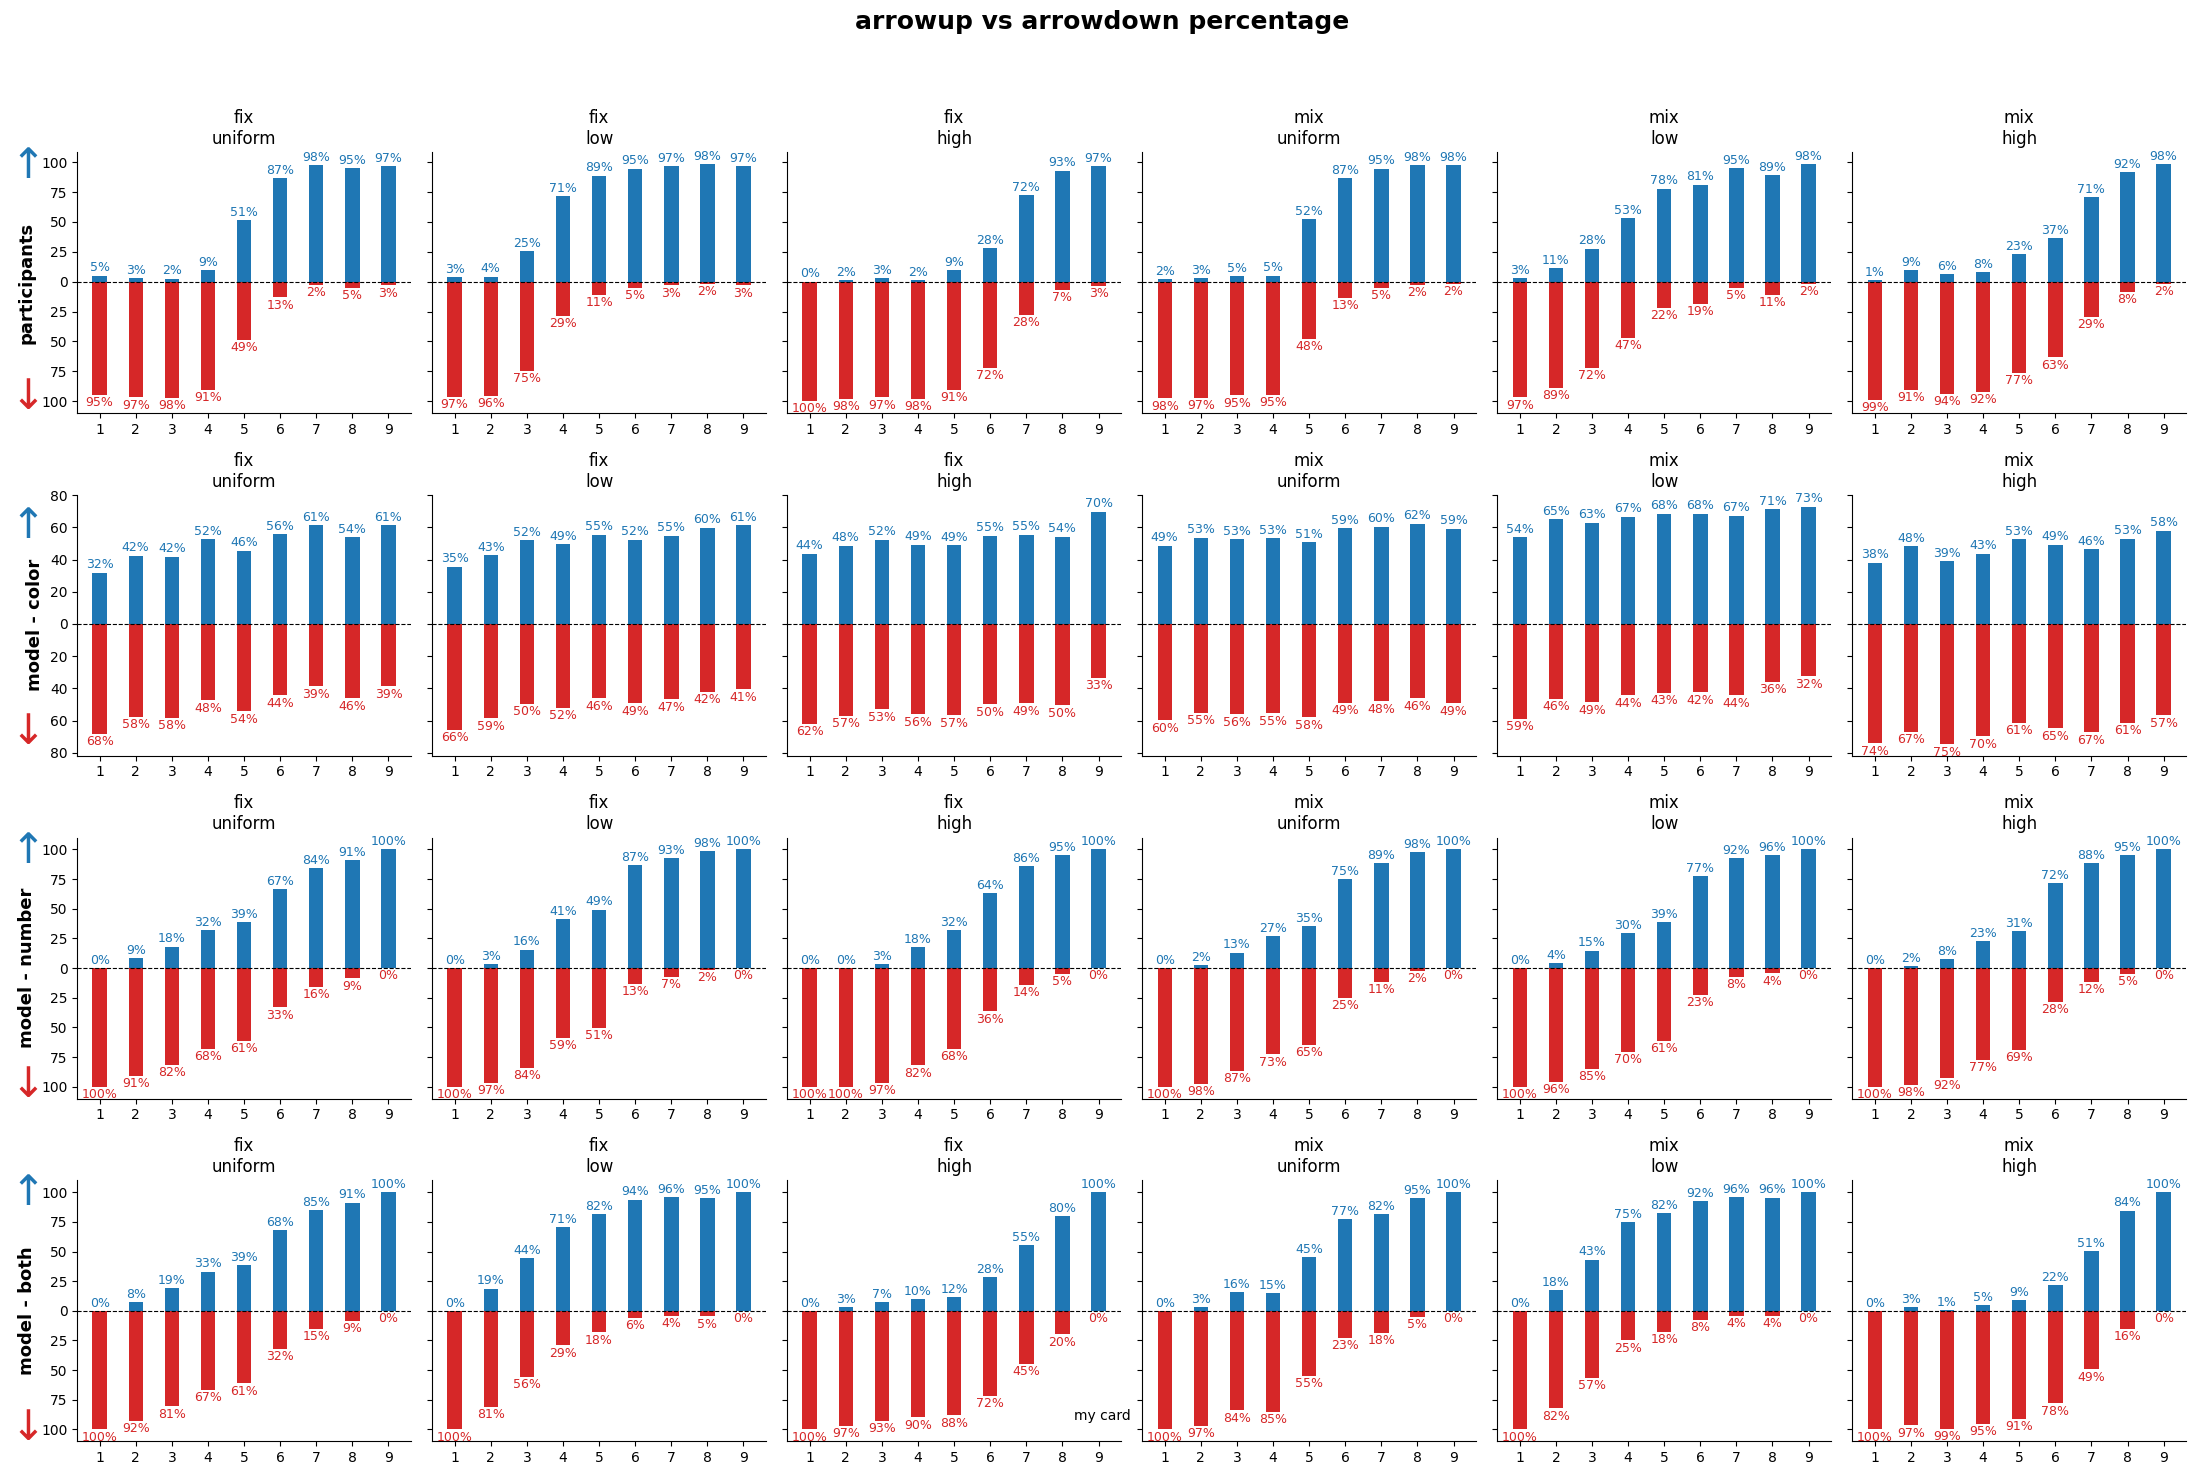

In [13]:
datasets = [
    (df_participants, 'participants', 'choice'),
    (df_colors, 'model - color', 'model_choices'),
    (df_numbers, 'model - number', 'model_choices'),
    (df_colors_numbers, 'model - both', 'model_choices')
]

distributions = ['uniform', 'low', 'high']
plot_data = []

for df_group, group_name, choice_col in datasets:
    for block_type in ['not_mix', 'mix']:
        for dist in distributions:
            group_results = []
            for df in df_group:
                if block_type == 'mix':
                    sub_df = df[(df['block_type'] == 'mix') & (df['distribution'] == dist)].copy()
                else:
                    sub_df = df[(df['block_type'] != 'mix') & (df['distribution'] == dist)].copy()

                sub_df.loc[:, 'group'] = pd.cut(
                    sub_df['myCard'],
                    bins=np.arange(0.5, 10.5, 1),
                    labels=list(range(1, 10))
                )

                if choice_col == 'choice':
                    group_counts = sub_df.groupby(['group', choice_col], observed=True)[choice_col].count().unstack(fill_value=0)
                else:
                    sub_df[choice_col] = sub_df[choice_col].map({1: 'arrowup', 0: 'arrowdown'})
                    group_counts = sub_df.groupby(['group', choice_col], observed=True)[choice_col].count().unstack(fill_value=0)

                group_totals = group_counts.sum(axis=1)
                group_percentages = (group_counts.T / group_totals).T * 100
                group_percentages['group'] = group_percentages.index
                group_results.append(group_percentages.reset_index(drop=True))

            combined_results = pd.concat(group_results).groupby('group', observed=True).mean().reset_index()
            plot_data.append((group_name, block_type, dist, combined_results))

fig, axes = plt.subplots(4, 6, figsize=(22, 15), sharey='row')

for i, (group_name, block_type, dist, data) in enumerate(plot_data):
    row = i // 6
    col = i % 6
    ax = axes[row, col]
    groups = data['group']
    arrow_up = data.get('arrowup', 0)
    arrow_down = data.get('arrowdown', 0)
    x = np.arange(len(groups))
    bar_width = 0.4

    bars_up = ax.bar(x, arrow_up, bar_width, color='#1f77b4')
    bars_down = ax.bar(x, -arrow_down, bar_width, color='#d62728')

    for j in range(len(x)):
        ax.text(x[j], arrow_up[j] + 1, f'{round(arrow_up[j])}%', ha='center', va='bottom', fontsize=9, color='#1f77b4')
        ax.text(x[j], -arrow_down[j] - 1, f'{round(arrow_down[j])}%', ha='center', va='top', fontsize=9, color='#d62728')

    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

    yticks = ax.get_yticks()
    ax.yaxis.set_major_locator(FixedLocator(yticks))
    ax.set_yticklabels([abs(int(t)) if t < 0 else int(t) for t in yticks])

    ax.set_title(f"{'mix' if block_type == 'mix' else 'fix'}\n{dist.lower()}")

    if col == 0:
        ax.text(-2, ax.get_ylim()[1] * 0.9, '↑', color='#1f77b4', fontsize=30, ha='center', va='center')
        ax.text(-2, ax.get_ylim()[0] * 0.9, '↓', color='#d62728', fontsize=30, ha='center', va='center')
        ax.set_ylabel(group_name, fontsize=13, fontweight='bold')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

fig.text(0.5, 0.04, 'my card', ha='center')
fig.suptitle('arrowup vs arrowdown percentage', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "arrowup_arrowdown_percentage.pdf")
plt.savefig(filename, format='pdf')
plt.show()


# representational similarity analysis:

In [18]:

# def compute_rsa_matrix_similarity(df_list, key_column):
#     num_participants = len(df_list)
#     rsa_matrix = np.zeros((num_participants, num_participants))

#     for i in range(num_participants):
#         for j in range(num_participants):
#             reward_i = df_list[i][key_column].values
#             reward_j = df_list[j][key_column].values
#             distance = euclidean(reward_i, reward_j)
#             rsa_matrix[i, j] = distance

#     # normalizing to similarity between 0 and 1 cause I want similarity not dismilarity
#     max_val = np.max(rsa_matrix)
#     min_val = np.min(rsa_matrix)
#     similarity_matrix = 1 - (rsa_matrix - min_val) / (max_val - min_val + 1e-8)

#     return similarity_matrix

# def cluster_rsa_matrix(similarity_matrix):
#     dissimilarity = 1 - similarity_matrix
#     dissimilarity = (dissimilarity + dissimilarity.T) / 2  
#     np.fill_diagonal(dissimilarity, 0)
#     linkage_matrix = linkage(squareform(dissimilarity), method='average')
#     ordered_indices = leaves_list(linkage_matrix)
#     return similarity_matrix[ordered_indices][:, ordered_indices], ordered_indices
# rsa_participants_sim = compute_rsa_matrix_similarity(df_participants, 'totalReward')
# rsa_participants_sim_clustered, indices_participants = cluster_rsa_matrix(rsa_participants_sim)

# rsa_colors_sim = compute_rsa_matrix_similarity(df_colors, 'model_total_reward')
# rsa_numbers_sim = compute_rsa_matrix_similarity(df_numbers, 'model_total_reward')
# rsa_colors_numbers_sim = compute_rsa_matrix_similarity(df_colors_numbers, 'model_total_reward')

# rsa_colors_sim = rsa_colors_sim[indices_participants][:, indices_participants]
# rsa_numbers_sim = rsa_numbers_sim[indices_participants][:, indices_participants]
# rsa_colors_numbers_sim = rsa_colors_numbers_sim[indices_participants][:, indices_participants]



# fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# titles = ['participants', 'model - colors', 'model - numbers', 'model - both']
# rsa_matrices_sim = [rsa_participants_sim_clustered, rsa_colors_sim, rsa_numbers_sim, rsa_colors_numbers_sim]

# cbar_ax = fig.add_axes([0.91, 0.25, 0.015, 0.5])
# vmin, vmax = 0, 1
# labels = [str(i).lower() for i in indices_participants]

# for ax, rsa_matrix, title in zip(axes, rsa_matrices_sim, titles):
#     sns.heatmap(
#         rsa_matrix,
#         ax=ax,
#         cmap='Blues',  # single color scale
#         cbar=(ax == axes[-1]),
#         cbar_ax=None if ax != axes[-1] else cbar_ax,
#         square=True,
#         vmin=vmin,
#         vmax=vmax,
#         annot=False,
#         xticklabels=labels,
#         yticklabels=labels
#     )
#     ax.set_title(title, fontweight='bold')
#     ax.set_xlabel('participant')
#     ax.set_ylabel('participant')


# plt.suptitle('representational similarity analysis (rsa) for total reward', fontsize=16, fontweight='bold')
# plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # adjusted for new colorbar position

# filename = os.path.join(output_dir, "rsa_total_reward.pdf")
# plt.savefig(filename, format='pdf')
# plt.show()
